In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import utils
import pandas as pd
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os
from PIL import Image
Image.MAX_IMAGE_PIXELS = 1000000000

In [9]:
import keras
from keras.models import Sequential, Model, Input
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.regularizers import l2
from keras.layers.normalization import BatchNormalization
from keras.models import load_model
import h5py

In [110]:
import numpy as np

In [3]:
train_data_path = '/home/ec2-user/Capstone_Project/code/left-pca16' # Full path should be given here 
train_mask_path = 'mask/train/'
test_data_path = '/home/ec2-user/Capstone_Project/code/right-pca16' # Full path should be given here 
test_mask_path = 'mask/test/'

In [4]:
# Read data form training and test 

In [5]:
X_train,Y_train, num_bands = utils.load_data(data_path = train_data_path, 
                                             masks_path = train_mask_path, 
                                             crop_size = 33, 
                                             num_classes = 6, 
                                             samples = 50000, 
                                             balance = True)



 balance:  True

 number of samples:  300000 

loading class:  1  - samples:  50000
loading class:  2  - samples:  50000
loading class:  3  - samples:  50000
loading class:  4  - samples:  50000
loading class:  5  - samples:  50000
loading class:  6  - samples:  49999


In [6]:
X_test,Y_test, num_bands = utils.load_data(data_path = test_data_path, 
                                           masks_path = test_mask_path, 
                                           crop_size = 33, 
                                           num_classes = 6, 
                                           samples = 10000, 
                                           balance = True)



 balance:  True

 number of samples:  60000 

loading class:  1  - samples:  10000
loading class:  2  - samples:  10000
loading class:  3  - samples:  10000
loading class:  4  - samples:  10000
loading class:  5  - samples:  10000
loading class:  6  - samples:  10000


In [39]:
# creat generato

In [7]:
print(type(X_train), type(Y_train))
print(X_train.shape, Y_train.shape, num_bands)
print(X_test.shape,  Y_test.shape,  num_bands)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(299999, 33, 33, 16) (299999, 6) 16
(60000, 33, 33, 16) (60000, 6) 16


In [8]:
X_train = np.array([X_train[i] for i in range(X_train.shape[0])])

In [9]:
X_test = np.array([X_test[i] for i in range(X_test.shape[0])])

In [10]:
Y_train = np.array([Y_train[i,:] for i in range(Y_train.shape[0])])

In [11]:
Y_test = np.array([Y_test[i,:] for i in range(Y_test.shape[0])])

# Build Second Model

In [12]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides=(1, 1), input_shape=(33, 33, 16), kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('softplus'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), strides=(1, 1), kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('softplus'))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), strides=(1, 1), kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('softplus'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model.add(Flatten())
model.add(Dense(128, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('softplus'))
model.add(Dropout(0.5))

model.add(Dense(6, kernel_regularizer=l2(0.01)))
model.add(Activation('softmax')) 

In [13]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=0.1, rho=0.95, epsilon=1e-07, decay=0.0),
              metrics=['accuracy'])

In [14]:
model.fit(X_train, Y_train,
          epochs = 20,
          verbose = 1,
          batch_size= 128,
          validation_data=(X_test, Y_test))

Train on 299999 samples, validate on 60000 samples
Epoch 1/20
299999/299999 [==============================] - 81s 270us/step - loss: 1.9166 - acc: 0.9126 - val_loss: 1.5401 - val_acc: 0.7582
Epoch 2/20
299999/299999 [==============================] - 76s 252us/step - loss: 0.6142 - acc: 0.9577 - val_loss: 1.0519 - val_acc: 0.7821
Epoch 3/20
299999/299999 [==============================] - 75s 249us/step - loss: 0.3888 - acc: 0.9673 - val_loss: 1.2569 - val_acc: 0.7017
Epoch 4/20
299999/299999 [==============================] - 75s 248us/step - loss: 0.2913 - acc: 0.9723 - val_loss: 1.3145 - val_acc: 0.7055
Epoch 5/20
299999/299999 [==============================] - 74s 248us/step - loss: 0.2372 - acc: 0.9753 - val_loss: 0.7081 - val_acc: 0.8267
Epoch 6/20
299999/299999 [==============================] - 74s 248us/step - loss: 0.2038 - acc: 0.9771 - val_loss: 0.8798 - val_acc: 0.7805
Epoch 7/20
299999/299999 [==============================] - 75s 249us/step - loss: 0.1795 - acc: 0.9791

In [16]:
model.save('model_1_2.h5')

In [10]:
model_1_2 = load_model('model_1_2.h5')

In [5]:
# this make aure all the layers are trainable
for layer in model.layers:
    print(layer.trainable, layer.name)

True conv2d_1
True batch_normalization_1
True activation_1
True max_pooling2d_1
True conv2d_2
True batch_normalization_2
True activation_2
True conv2d_3
True batch_normalization_3
True activation_3
True max_pooling2d_2
True flatten_1
True dense_1
True batch_normalization_4
True activation_4
True dropout_1
True dense_2
True activation_5


# Prediction

In [11]:
from hsi_cnn_reader import hsi_cnn_reader

In [118]:
from classify import prob2class

ImportError: cannot import name 'prob2class'

In [97]:
def cnn_classify_batch(data_path, masks_path, crop_size, num_classes, model, npixels):

    # create the reader object
    reader = hsi_cnn_reader(data_path,
                            masks_path,
                            crop_size=(crop_size, crop_size),
                            npixels=npixels)

    num_samples, num_bands, rows, cols = reader.data_dims()
    # print(num_samples, num_bands, rows, cols)

    # compute and the confusion matrix and response array file
    envi_probs = np.zeros((rows, cols, num_classes), dtype=np.float32)
    # pbar = ProgressBar(maxval=num_samples).start()
    # k = 0
    # print('\n Total number of pixels to classify: ', num_samples, '\n')
    # plt.ion()
    # y_true = []
    # y_pred = []
    # print(type(reader))

    for (input_, labels, idx) in reader:
        #print(np.asanyarray(input_).shape, np.asanyarray(labels).shape, np.asanyarray(idx).shape)
        #print(idx)
        if len(input_) > 0:
            # y_true.append(labels)
            # Run the model
            prediction = model.predict(input_)
            #print(prediction.shape)
            #print(prediction)
            envi_probs[idx[:, 0], idx[:, 1], :] = np.asarray(prediction)
            #class_image = classify.prob2class(np.rollaxis(envi_probs, 2, 0))
            #rgb = classify.class2color(class_image)
            #plt.imshow(rgb)
            #plt.pause(0.05)
            #print('\n\t k: ', k)
            # y_pred.append(np.argmax(prediction, 1))
            #k += len(input_)
            #pbar.update(k)
    
    # y_true_flat = [item for sublist in y_true for item in sublist]
    # y_pred_flat = [item for sublist in y_pred for item in sublist]
    # conf_mat = confusion_matrix(y_true_flat, y_pred_flat)
    return envi_probs
    # return envi_probs, conf_mat

In [98]:
crop_1_data_path = '/home/ec2-user/Capstone_Project/code/crop_1'
crop_mask_1_path = '/home/ec2-user/Capstone_Project/code/crop_mask_1'


In [99]:
envi_prob = cnn_classify_batch(data_path = crop_1_data_path,
                               masks_path = crop_mask_1_path,
                               crop_size = 33,
                               num_classes = 6,
                               model = model_1_2, 
                               npixels = 100)

1128252 16 1344 1376


In [100]:
envi_prob.shape

(1344, 1376, 6)

In [ ]:
np.rollaxis(envi_prob, 2, 0)

In [141]:
envi_prob[:,:,0].shape

(1344, 1376)

In [146]:
envi_prob[:,:,0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [138]:
envi_prob[1000,200,:]

array([1.4037357e-03, 2.8372081e-03, 7.0528651e-04, 9.8753291e-01,
       3.7064864e-03, 3.8143648e-03], dtype=float32)

In [145]:
import matplotlib.pyplot as plt
% matplotlib  inline

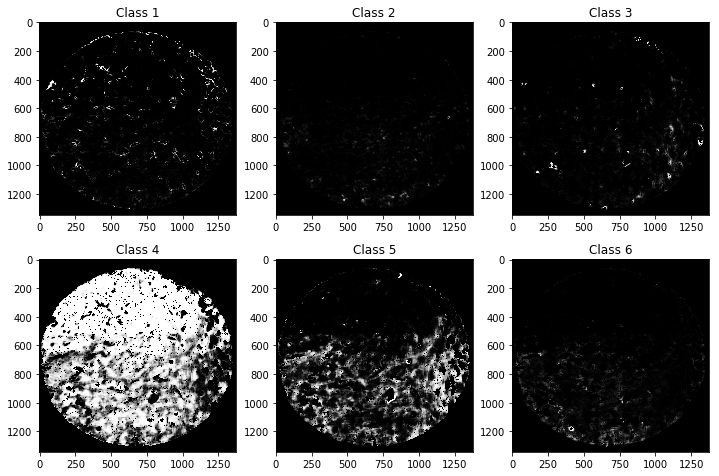

In [224]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs = axs.ravel()
# https://matplotlib.org/users/colormaps.html
# colors = ['bone','pink','summer','autumn','winter','spring']
# 'gist_yarg'
for i in range(6):
    im = axs[i].imshow(envi_prob[:,:,i],cmap='gist_gray')
    axs[i].set_title('Class {}'.format(i+1))

In [205]:
import numpy
import colorsys

In [168]:
def prob2class(prob_image):
    class_image = numpy.zeros(prob_image.shape, dtype=numpy.bool)
    #get nonzero indices
    nnz_idx = numpy.transpose(numpy.nonzero(numpy.sum(prob_image, axis=0)))
    
    #set pixel corresponding to max probability to 1
    for idx in nnz_idx:
        idx_max_prob = numpy.argmax(prob_image[:, idx[0], idx[1]])
        class_image[idx_max_prob, idx[0], idx[1]] = 1

    return class_image

In [176]:
envi_prob1 = np.rollaxis(envi_prob, 2, 0)

In [182]:
class_image = np.zeros(envi_prob1.shape, dtype=np.bool)

In [183]:
envi_prob1.shape

(6, 1344, 1376)

In [180]:
nz_idx = np.transpose(np.nonzero(np.sum(envi_prob1, axis=0)))

In [184]:
nz_idx.shape

(1128050, 2)

In [186]:
for idx in nz_idx:
    idx_max_prob = np.argmax(envi_prob1[:, idx[0], idx[1]])
    class_image[idx_max_prob, idx[0], idx[1]] = 1

In [187]:
class_image.shape

(6, 1344, 1376)

In [190]:
nc = class_image.shape[0]
nc

6

In [195]:
s = class_image.shape[1:]
s

(1344, 1376)

In [196]:
s = np.append(s, 3)
s

array([1344, 1376,    3])

In [198]:
RGB = np.zeros(s, dtype=np.ubyte)

In [206]:
for c in range(0,nc):
    color = qualcolor(c, nc)
    RGB[class_image[c, ...], :] = color

In [207]:
RGB.shape

(1344, 1376, 3)

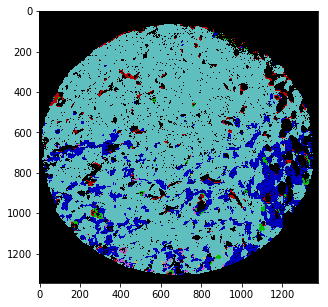

In [210]:
plt.figure(figsize=(5,5))
plt.imshow(RGB)

In [203]:
#generate N qualitative colors and return the value for color c
def qualcolor(c, N):
    dN = numpy.ceil(numpy.sqrt(N)).astype(numpy.int32)
    h = c/N
    
    sp = c/N * 2 * numpy.pi * dN + numpy.pi/2
    s = numpy.sin(sp) * 0.25 + 0.75
    
    vp = c/N * 2 * numpy.pi * dN
    v = numpy.sin(vp) * 0.25 + 0.75
    
    rgb = numpy.array(colorsys.hsv_to_rgb(h, s, v))
    return rgb * 255

In [ ]:
def class2color(C):
    
    #determine the number of classes
    nc = C.shape[0]
    
    s = C.shape[1:]
    s = numpy.append(s, 3)

    #generate an RGB image
    RGB = numpy.zeros(s, dtype=numpy.ubyte)
    
    #for each class
    for c in range(0, nc):
        color = qualcolor(c, nc)
        RGB[C[c, ...], :] = color
    
    return RGB